In [185]:
import importlib

import ase.io as aio
from ase.units import Bohr
import numpy as np
import glob
import pandas as pd

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import bt_tools as bt
importlib.reload(bt)

import utils_qm as uqm

from matplotlib import pyplot as plt

def ref_scatter(ref):
    return(np.linspace(np.amin(ref), np.amax(ref), 3))


    
r2 = lambda y_r, y_f: ((y_f-y_r.mean())**2).sum()/((y_r-y_r.mean())**2).sum()

from sklearn.metrics import r2_score



In [186]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/all_energies.csv')

In [187]:
data_2 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

In [188]:
def model_dbar(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
        
        if Z1 >= 6 and Z1 <= 9:
            y = -beta2**2*(Z1**(7/3)+Z2**(7/3))+alpha2-(b_prime**2+1/dbar2**2)*Z1*Z2
        elif Z1 >= 14 and Z1 <= 17:
            y = -beta3**2*(Z1**(7/3)+Z2**(7/3))+alpha3-(b_prime**2+1/dbar3**2)*Z1*Z2
        elif Z1 >= 32 and Z1 <= 35:
            y = -beta4**2*(Z1**(7/3)+Z2**(7/3))+alpha4-(b_prime**2+1/dbar4**2)*Z1*Z2
        y_vec.append(y)

    return(y_vec)

def model_dbar_ari(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
        
        if Z1 >= 6 and Z1 <= 9:
            y = -beta2**2*(Z1**(7/3)+Z2**(7/3))+alpha2-(b_prime**2+1/dbar2**2)*Z1*Z2
        elif Z1 >= 14 and Z1 <= 17:
            y = -beta3**2*(Z1**(7/3)+Z2**(7/3))+alpha3-(b_prime**2+1/dbar3**2)*Z1*Z2
        elif Z1 >= 32 and Z1 <= 35:
            y = -beta4**2*(Z1**(7/3)+Z2**(7/3))+alpha4-(b_prime**2+1/dbar4**2)*Z1*Z2
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha = (alpha_1+alpha_2)/2
        beta = (beta_1+beta_2)/2
        dbar = (dbar_1+dbar_2)/2
        
        y = -beta**2*(Z1**(7/3)+Z2**(7/3))+alpha-(b_prime**2+1/dbar**2)*Z1*Z2 
        
        y_vec.append(y)

    return(y_vec)

def model_dbar_geo(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
        
        if Z1 >= 6 and Z1 <= 9:
            y = -beta2**2*(Z1**(7/3)+Z2**(7/3))+alpha2-(b_prime**2+1/dbar2**2)*Z1*Z2
        elif Z1 >= 14 and Z1 <= 17:
            y = -beta3**2*(Z1**(7/3)+Z2**(7/3))+alpha3-(b_prime**2+1/dbar3**2)*Z1*Z2
        elif Z1 >= 32 and Z1 <= 35:
            y = -beta4**2*(Z1**(7/3)+Z2**(7/3))+alpha4-(b_prime**2+1/dbar4**2)*Z1*Z2
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha = np.sqrt(alpha_1**2*alpha_2**2)
        beta = np.sqrt(beta_1**2*beta_2**2)
        dbar = np.sqrt(dbar_1**2*dbar_2**2)
        
        y = -beta*(Z1**(7/3)+Z2**(7/3))+alpha-(b_prime**2+1/dbar)*Z1*Z2 
        
        y_vec.append(y)

    return(y_vec)

In [189]:
# initial guess for parameters
b2 = bt.BDE_clean.fromdict(data_2)
b3 = bt.BDE_clean.fromdict(data_3)
b4 = bt.BDE_clean.fromdict(data_4)


for b in [b2, b3, b4]:
    b.fit(model_dbar, [1]*10)
    print(b.mae*630)
    
b_prime_ini = (b2.params[0][-1]+b3.params[0][-1]+b4.params[0][-1])/3
alpha2, beta2, dbar2 = b2.params[0][0], b2.params[0][1], b2.params[0][2]
alpha3, beta3, dbar3 = b3.params[0][3], b3.params[0][4], b3.params[0][5]
alpha4, beta4, dbar4 = b4.params[0][6], b4.params[0][7], b4.params[0][8]

dbar2_ini = 4
dbar3_ini = 4
dbar4_ini = 4

p0 = [alpha2, beta2, dbar2_ini, alpha3, beta3, dbar3_ini, alpha4, beta4, dbar4_ini, b_prime_ini]

0.9976078356801263
2.3466255659072957
2.172319532979383


/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [201]:
b_global = bt.BDE_clean.fromdict(data_234)
b_global.fit(model_dbar, p0)
data_234_shuffled = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].sample(frac=1).to_dict('list')
b_global_sh = bt.BDE_clean.fromdict(data_234_shuffled)
b_global_sh.fit(model_dbar, p0)
print(b_global_sh.mae*630)

1.8388380553097416


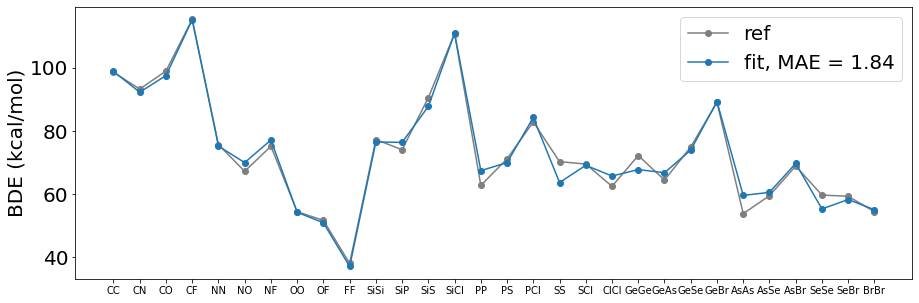

In [182]:
comp_names = []
for els in [['C', 'N', 'O', 'F'], ['Si', 'P', 'S', 'Cl'], ['Ge', 'As', 'Se', 'Br']]:
    for i in range(4):
        for j in range(i, 4):
            comp_names.append(f'{els[i]}{els[j]}')
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [15,5]

plt.plot(comp_names, b_global.bde*630, '-o',label = 'ref', color = 'tab:grey')
plt.plot(b_global.bde_fitted*630, '-o', label = f"fit, MAE = {np.round(b_global.mae*630, 2)}")

plt.xticks(fontsize=10)
plt.ylabel('BDE (kcal/mol)')

plt.legend()

In [184]:
b_global_sh.mae*630

1.8388436697477013

In [166]:
b_mixed = bt.BDE_clean.fromdict(data.to_dict('list'))
b_mixed_geo = bt.BDE_clean.fromdict(data.to_dict('list'))

In [167]:
b_mixed.fit(model_dbar_ari, p0)
b_mixed_geo.fit(model_dbar_geo, p0)

In [171]:
b_mixed_geo.mae*630

18.635359251280875

In [168]:
b_mixed.mae*630

13.343906999518177

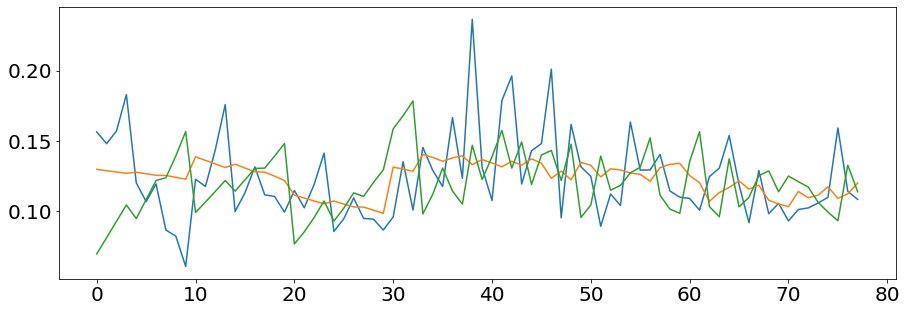

In [170]:
plt.plot(b_mixed.bde)
plt.plot(b_mixed.bde_fitted)
plt.plot(b_mixed_geo.bde_fitted)